In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, classification_report
from IPython.display import display
from ipywidgets import FileUpload, Output
import io
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:

# Load the CIFAR-10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


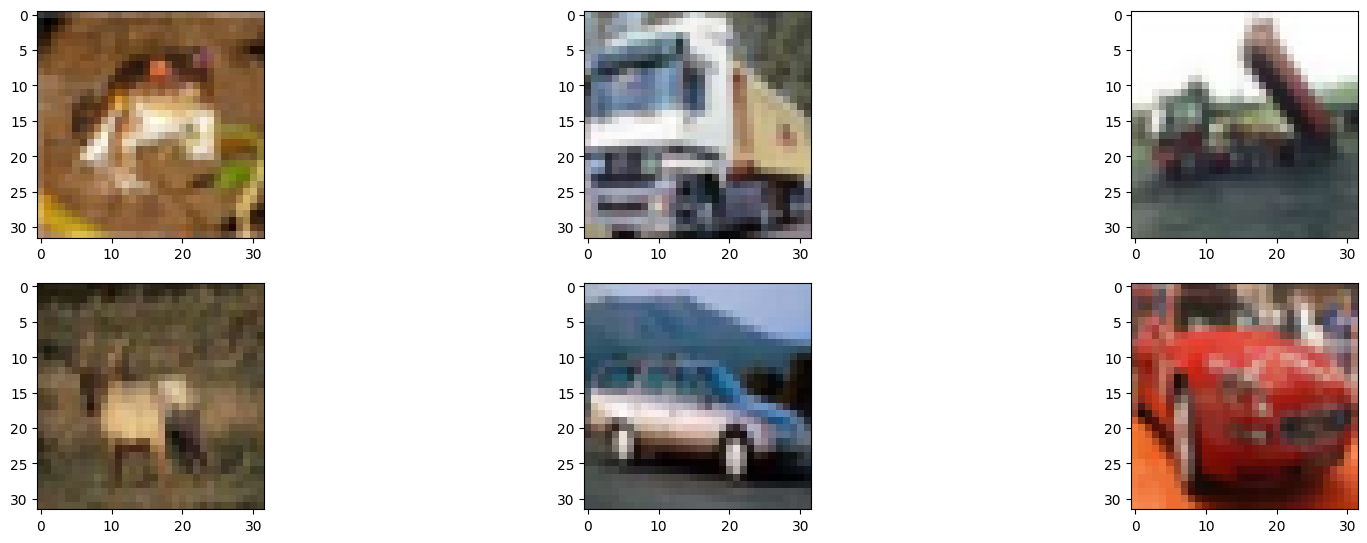

In [ ]:

# Display the first few images from the dataset
n = 6
plt.figure(figsize=(20, 10))
for i in range(n):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i])
plt.show()

In [ ]:
# Preprocess the data
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255.0
test_X /= 255.0
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [ ]:

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model using TensorFlow's SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=10, batch_size=32)


Epoch 1/10
1563/1563 [==============================] - 298s 190ms/step - loss: 1.7496 - accuracy: 0.3654 - val_loss: 1.4801 - val_accuracy: 0.4596
Epoch 2/10
1563/1563 [==============================] - 246s 157ms/step - loss: 1.4062 - accuracy: 0.4926 - val_loss: 1.2741 - val_accuracy: 0.5472
Epoch 3/10
1563/1563 [==============================] - 245s 157ms/step - loss: 1.2422 - accuracy: 0.5563 - val_loss: 1.1361 - val_accuracy: 0.5913
Epoch 4/10
1563/1563 [==============================] - 242s 155ms/step - loss: 1.1103 - accuracy: 0.6076 - val_loss: 1.0752 - val_accuracy: 0.6223
Epoch 5/10
1563/1563 [==============================] - 241s 154ms/step - loss: 1.0099 - accuracy: 0.6427 - val_loss: 1.0945 - val_accuracy: 0.6151
Epoch 6/10
1563/1563 [==============================] - 242s 155ms/step - loss: 0.9239 - accuracy: 0.6744 - val_loss: 1.0808 - val_accuracy: 0.6225
Epoch 7/10
1563/1563 [==============================] - 239s 153ms/step - loss: 0.8370 - accuracy: 0.7066 - val_

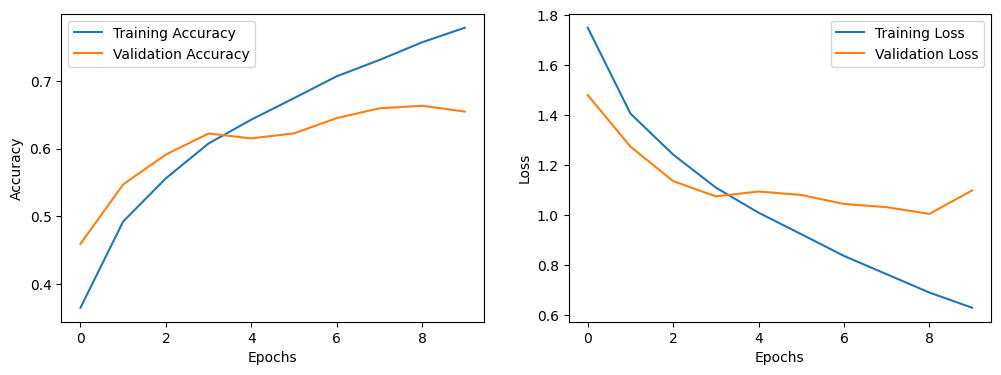

In [ ]:
# Visualize training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

# Evaluate the model on the test set
_, acc = model.evaluate(test_X, test_Y)
print("Test accuracy: {:.2f}%".format(acc * 100))

313/313 [==============================] - 10s 33ms/step - loss: 1.0989 - accuracy: 0.6547
Test accuracy: 65.47%


In [ ]:

# Predict test data
predictions = model.predict(test_X)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(test_Y, axis=1)

313/313 [==============================] - 11s 33ms/step


In [ ]:
# Compute F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score: {:.4f}".format(f1))


F1 Score: 0.6510


In [ ]:
# Define class labels for CIFAR-10
results = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

# Classification report
class_report = classification_report(y_true, y_pred, target_names=list(results.values()))
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

    airplane       0.62      0.74      0.68      1000
  automobile       0.71      0.84      0.77      1000
        bird       0.59      0.46      0.52      1000
         cat       0.47      0.44      0.46      1000
        deer       0.61      0.57      0.59      1000
         dog       0.57      0.59      0.58      1000
        frog       0.76      0.72      0.74      1000
       horse       0.76      0.68      0.71      1000
        ship       0.69      0.82      0.75      1000
       truck       0.75      0.69      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



FileUpload(value={}, description='Upload')

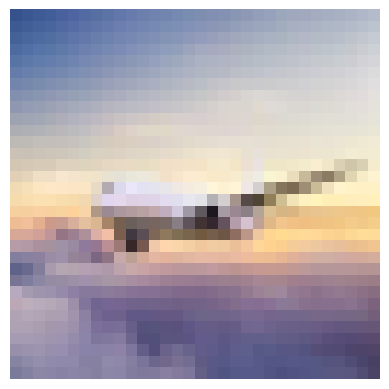

1/1 [==============================] - 0s 42ms/step
Predicted Class: airplane


In [ ]:

# Define a function to handle image upload and prediction
def handle_upload(change):
    uploaded_file = list(uploader.value.values())[0]
    image = Image.open(io.BytesIO(uploaded_file["content"])).resize((32, 32))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess the uploaded image
    uploaded_image = np.array(image).astype('float32')
    uploaded_image /= 255.0
    uploaded_image = uploaded_image.reshape((1, 32, 32, 3))

    # Make a prediction
    prediction = model.predict(uploaded_image)
    class_index = np.argmax(prediction)
    class_label = results[class_index]

    print("Predicted Class:", class_label)

# Create the file uploader widget
uploader = FileUpload()
uploader.observe(handle_upload, names='value')

# Display the uploader
display(uploader)

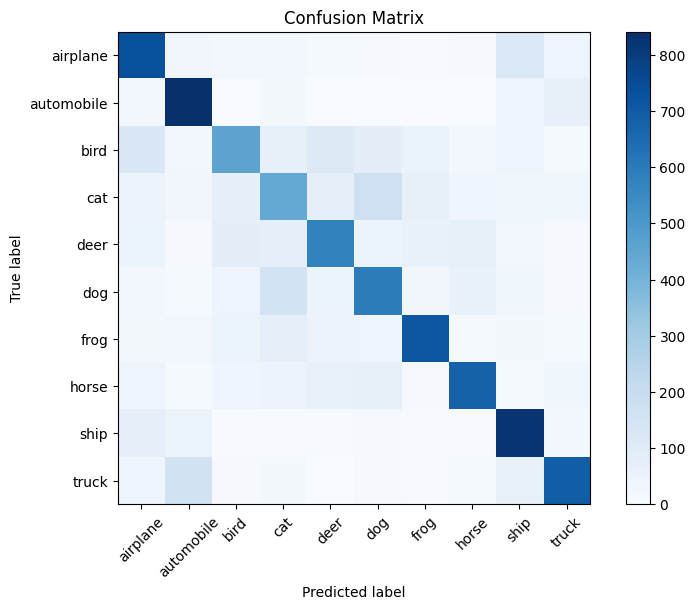

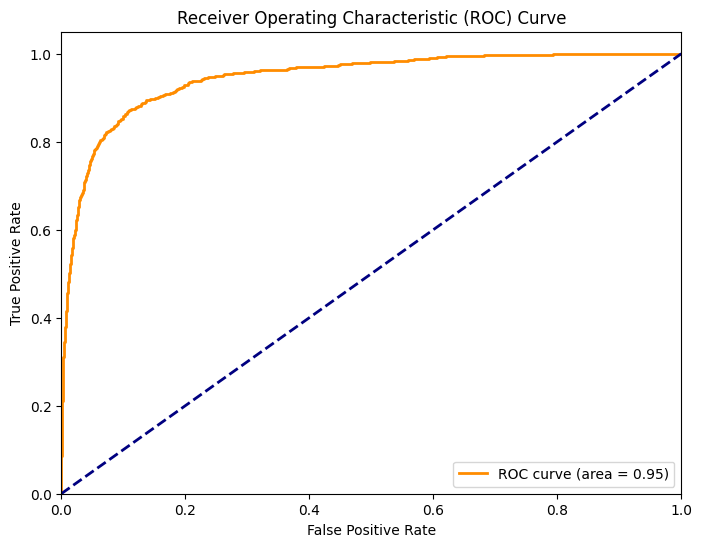

In [ ]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(results))
plt.xticks(tick_marks, results.values(), rotation=45)
plt.yticks(tick_marks, results.values())
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# ROC Curve for one class (e.g., airplane)
class_index_to_plot = 0  # Change this to plot ROC curve for a different class
fpr, tpr, _ = roc_curve(test_Y[:, class_index_to_plot], predictions[:, class_index_to_plot])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


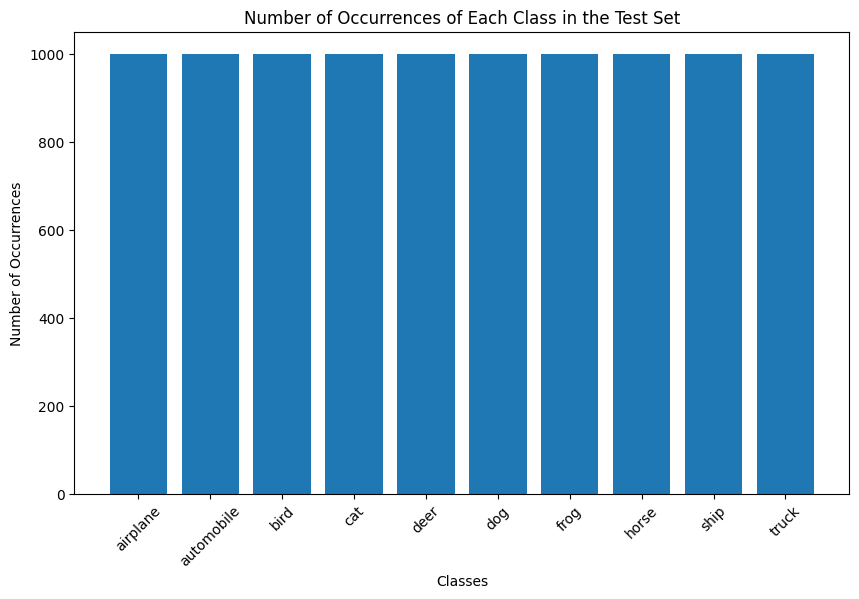

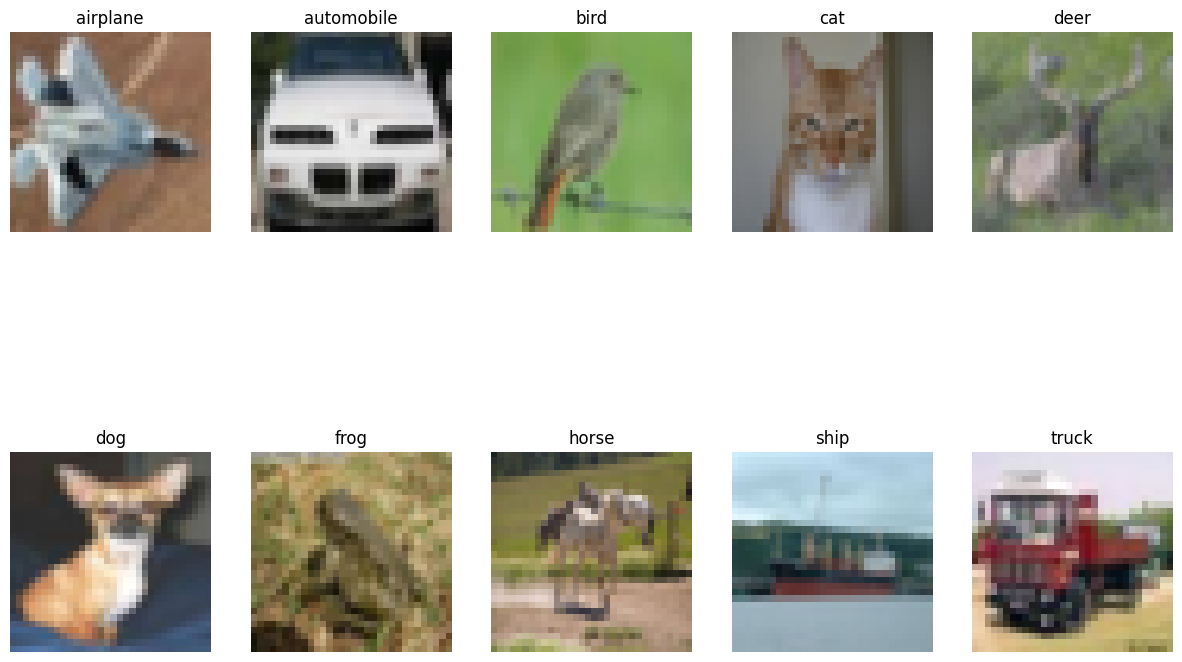

In [ ]:

# Calculate the number of occurrences of each class in the test set
class_counts = np.sum(test_Y, axis=0)

# Create a bar graph to display class occurrences
plt.figure(figsize=(10, 6))
plt.bar(results.values(), class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences of Each Class in the Test Set')
plt.xticks(rotation=45)
plt.show()

# Display a random image from each class
plt.figure(figsize=(15, 10))
for i in range(10):
    class_indices = np.where(y_true == i)[0]
    random_index = np.random.choice(class_indices)
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_X[random_index])
    plt.title(results[i])
    plt.axis('off')
plt.show()



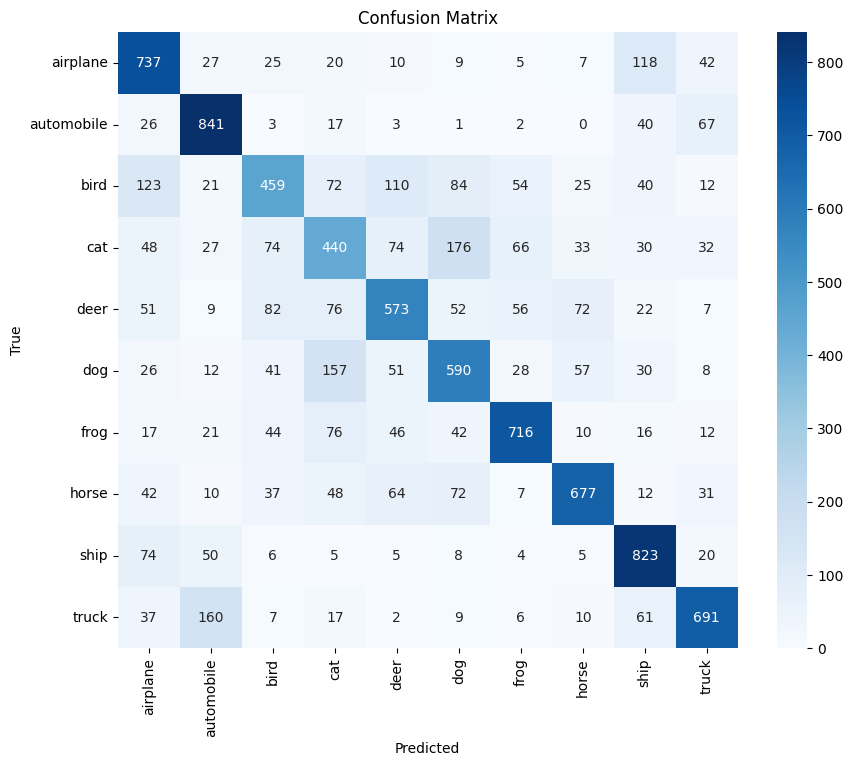

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ... (previous code)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues",
            xticklabels=results.values(), yticklabels=results.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ... (rest of the code)


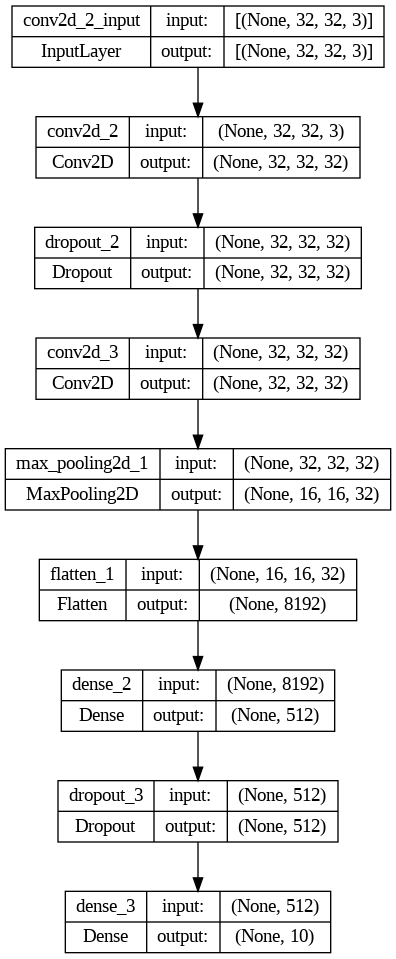

In [ ]:
import tensorflow.keras.utils as plot_utils

# ... (previous code)

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# ... (rest of the code)

# Plot the neural network architecture
plot_utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the architecture image
from IPython.display import Image
Image('model_architecture.png')
